## Ejercicios de pair programming 20 enero: Estandarización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Abrimos el df completo con outliers
df = pd.read_csv("../datos/world_risk_index2.csv", index_col = 0)
df.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0


In [3]:
#Abrimos el dataset solo de outliers
outliers = pd.read_csv("../datos/world_risk_index_outliers_norm.csv", index_col = 0)
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,Vanuatu,Very High,Very High,High,High,32.00,56.33,56.81,37.14,79.34,53.96,2011.0,0.563758
1,Tonga,Very High,Very High,Medium,Medium,29.08,56.04,51.90,28.94,81.80,44.97,2011.0,0.560853
2,Philippinen,Very High,Very High,High,High,24.32,45.09,53.93,34.99,82.78,44.01,2011.0,0.451167
3,Salomonen,Very High,Very High,Very High,High,23.51,36.40,64.60,44.11,85.95,63.74,2011.0,0.364119
4,Guatemala,Very High,Very High,High,High,20.88,38.42,54.35,35.36,77.83,49.87,2011.0,0.384353


In [4]:
#Abrimos el dataset sin outliers
df_limpio = pd.read_csv("../datos/world_risk_index_sin_outliers_norm.csv", index_col = 0)
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,Papua-Neuguinea,Very High,Very High,Very High,Very High,15.45,23.26,66.41,50.04,84.83,64.36,2011.0,0.895683
1,Madagaskar,Very High,Very High,Very High,Very High,14.46,20.68,69.91,67.51,85.65,56.57,2011.0,0.792566
2,Afghanistan,Very High,Very High,Very High,Very High,14.06,18.45,76.19,61.09,93.94,73.55,2011.0,0.703437
3,Niger,Very High,Very High,Very High,Very High,14.03,18.49,75.86,69.38,89.54,68.65,2011.0,0.705036
4,Gambia,Very High,Very High,High,High,13.90,22.20,62.63,45.29,83.99,58.62,2011.0,0.853317


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables

### Estandarización de las variables predictoras

Vamos a aplicar el método de estandarización en nuestro df sin outliers. Como vemos que tenemos pocos outliers vamos a relizar la normalización mediante StandardScaler

In [5]:
numericas = df_limpio.select_dtypes(include = np.number)

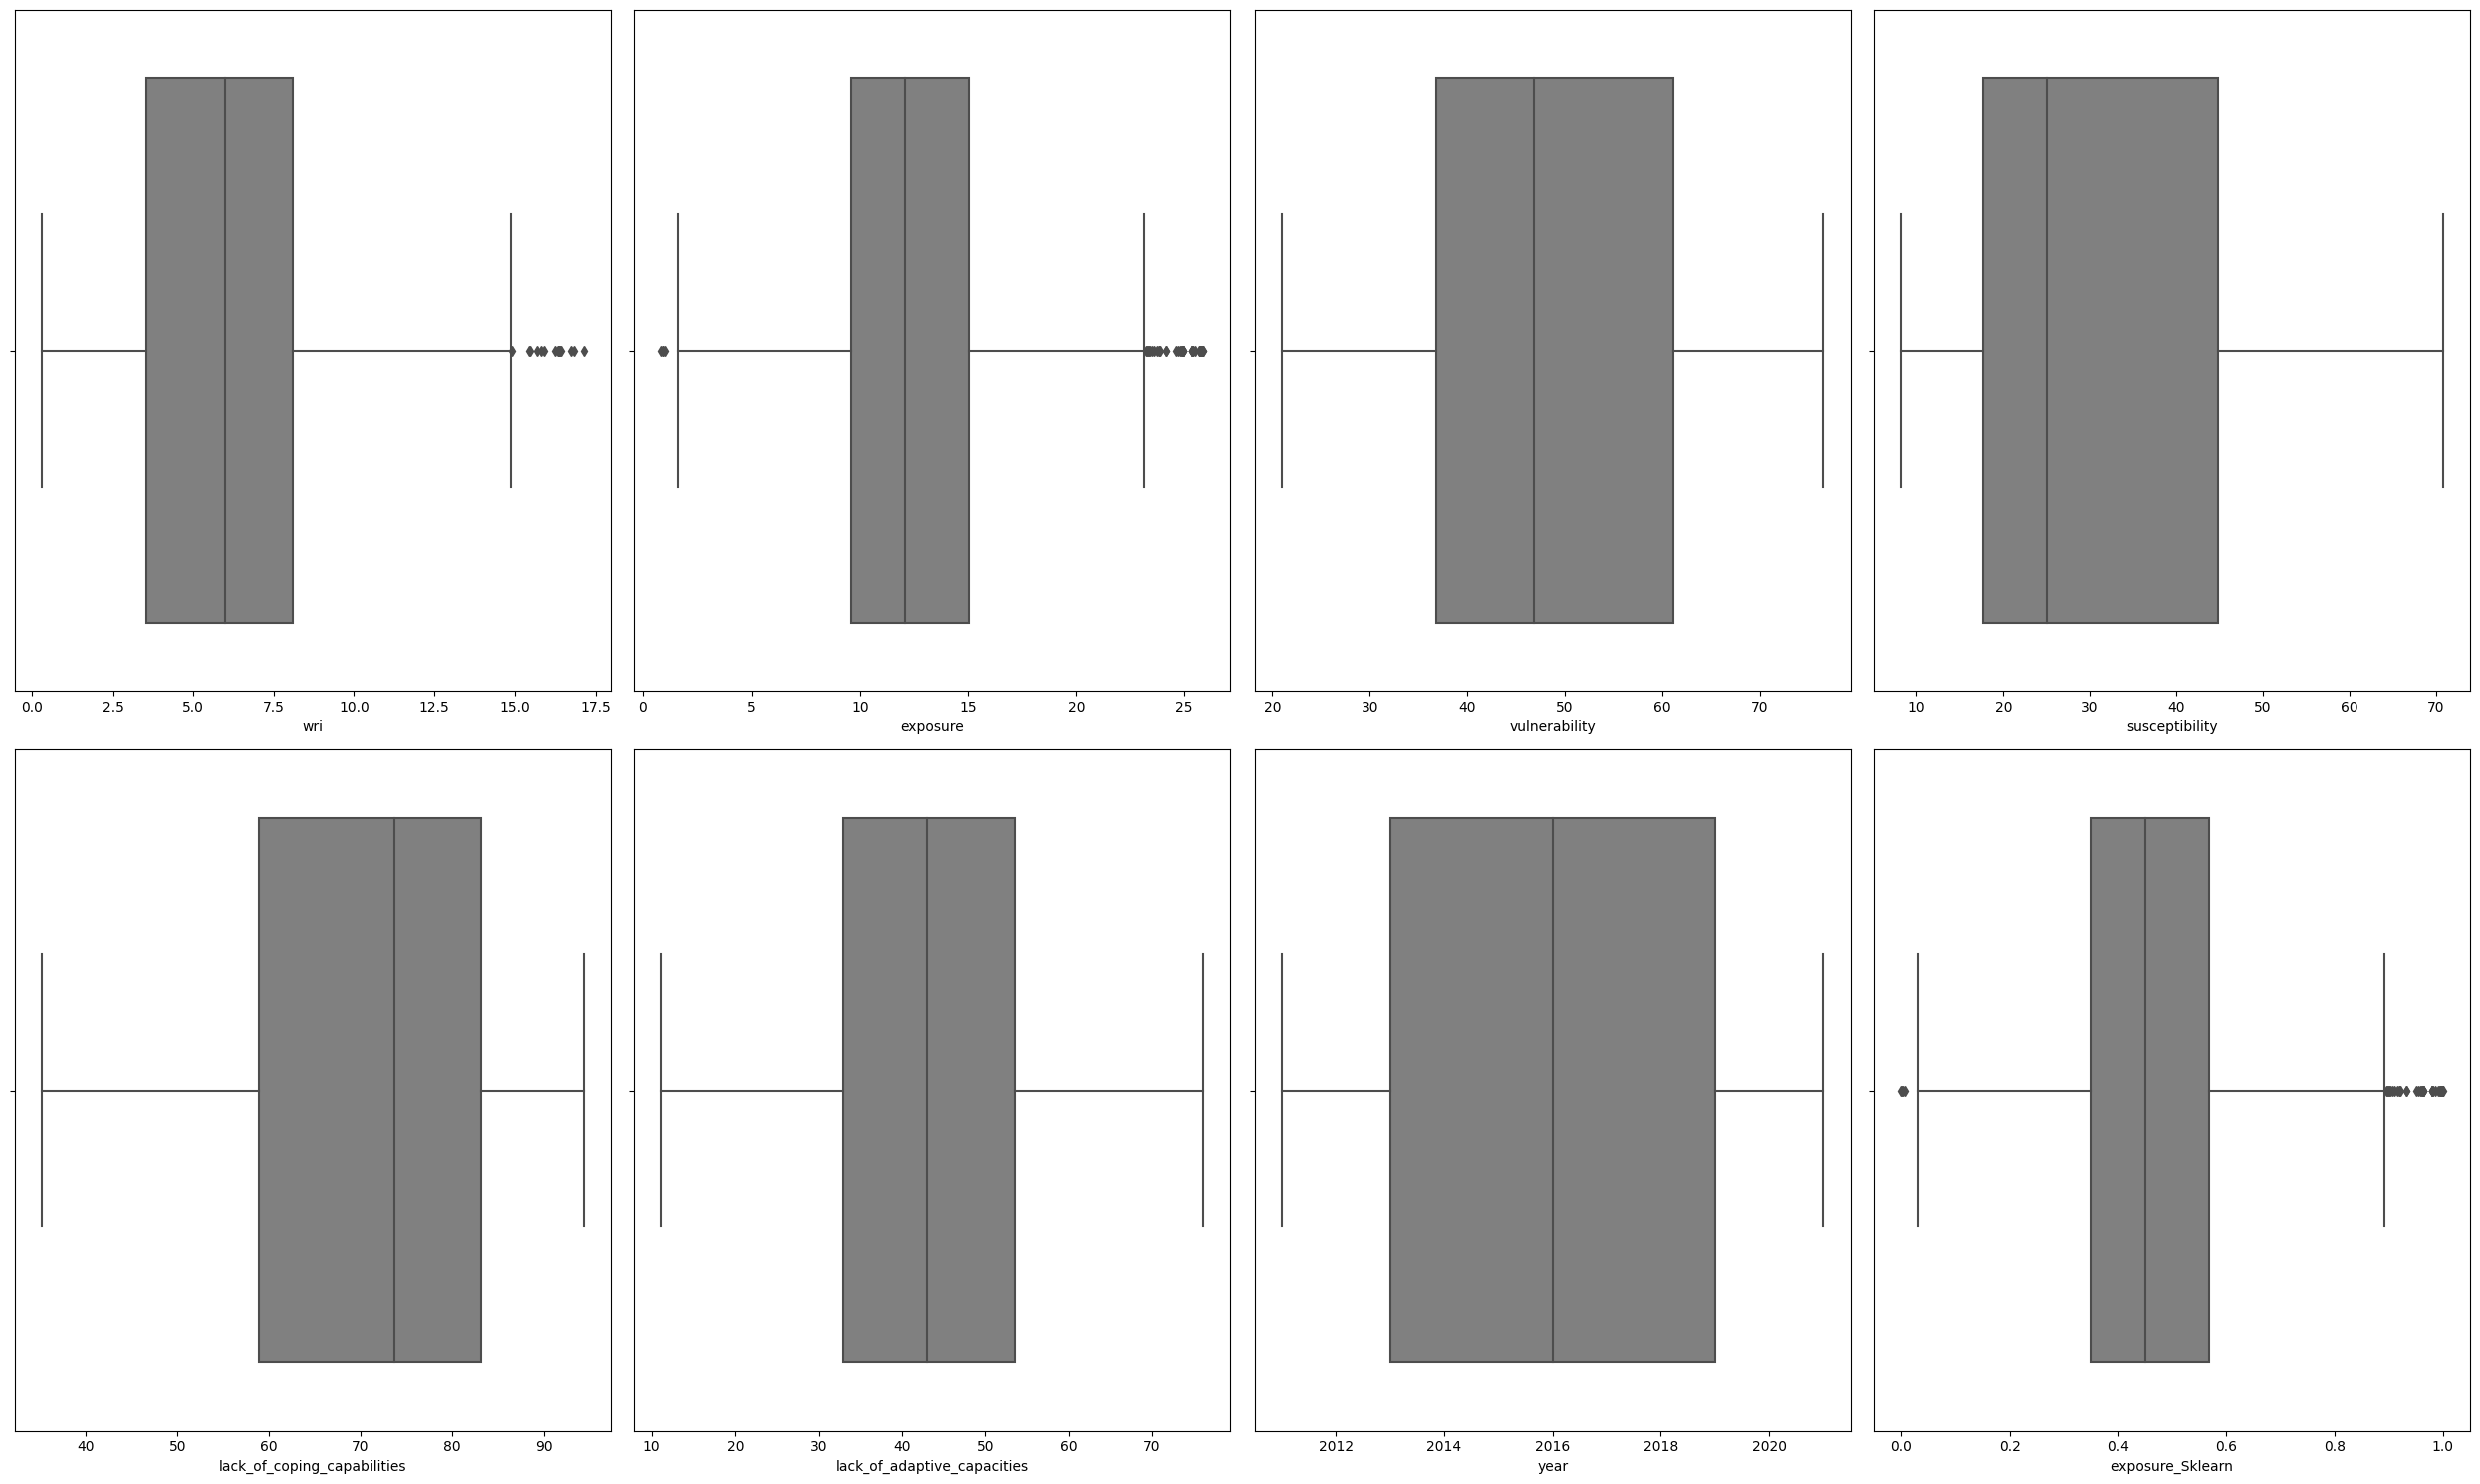

In [6]:
#Representamos para ver los outliers
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df_limpio, ax=axes[indice], color = "grey"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

In [7]:
#Como vemos que no tenemos muchos outliers decidimos hacer la estadndarizacion a través de StandardScaler
scaler = StandardScaler()

numericas.drop(['exposure', 'exposure_Sklearn', 'year'], axis = 1, inplace = True)

scaler.fit(numericas)

X_escaladas = scaler.transform(numericas)
numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)

numericas_estandar.head(2)

,wri,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities
0,2.906480,1.296928,1.179006,0.962932,1.537045
1,2.594391,1.545395,2.260942,1.017385,0.974085


In [8]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print('-------------------------------------------------------------')


La media de la columna wri es:  -4.9979559373512325e-17
La desviación estándar de la columna wri es: 1.0002932121452837
-------------------------------------------------------------
La media de la columna vulnerability es:  3.1653720936557806e-16
La desviación estándar de la columna vulnerability es: 1.0002932121452837
-------------------------------------------------------------
La media de la columna susceptibility es:  3.331970624900821e-17
La desviación estándar de la columna susceptibility es: 1.0002932121452837
-------------------------------------------------------------
La media de la columna lack_of_coping_capabilities es:  -1.874233476506712e-16
La desviación estándar de la columna lack_of_coping_capabilities es: 1.0002932121452839
-------------------------------------------------------------
La media de la columna lack_of_adaptive_capacities es:  1.832583843695452e-16
La desviación estándar de la columna lack_of_adaptive_capacities es: 1.0002932121452837
--------------------

In [9]:
numericas_estandar.describe().T #Comprobamos que la desviación estandar es 1 e igual para todos.

,count,mean,std,min,25%,50%,75%,max
wri,1706.0,-4.997956e-17,1.000293,-1.869419,-0.841734,-0.074122,0.587883,3.436084
vulnerability,1706.0,3.165372e-16,1.000293,-1.928878,-0.806519,-0.097324,0.921921,2.011092
susceptibility,1706.0,3.331971e-17,1.000293,-1.408474,-0.827406,-0.370200,0.855881,2.466553
lack_of_coping_capabilities,1706.0,-1.874233e-16,1.000293,-2.335455,-0.756984,0.228149,0.853362,1.595781
lack_of_adaptive_capacities,1706.0,1.832584e-16,1.000293,-2.307563,-0.743884,-0.008747,0.754031,2.386183


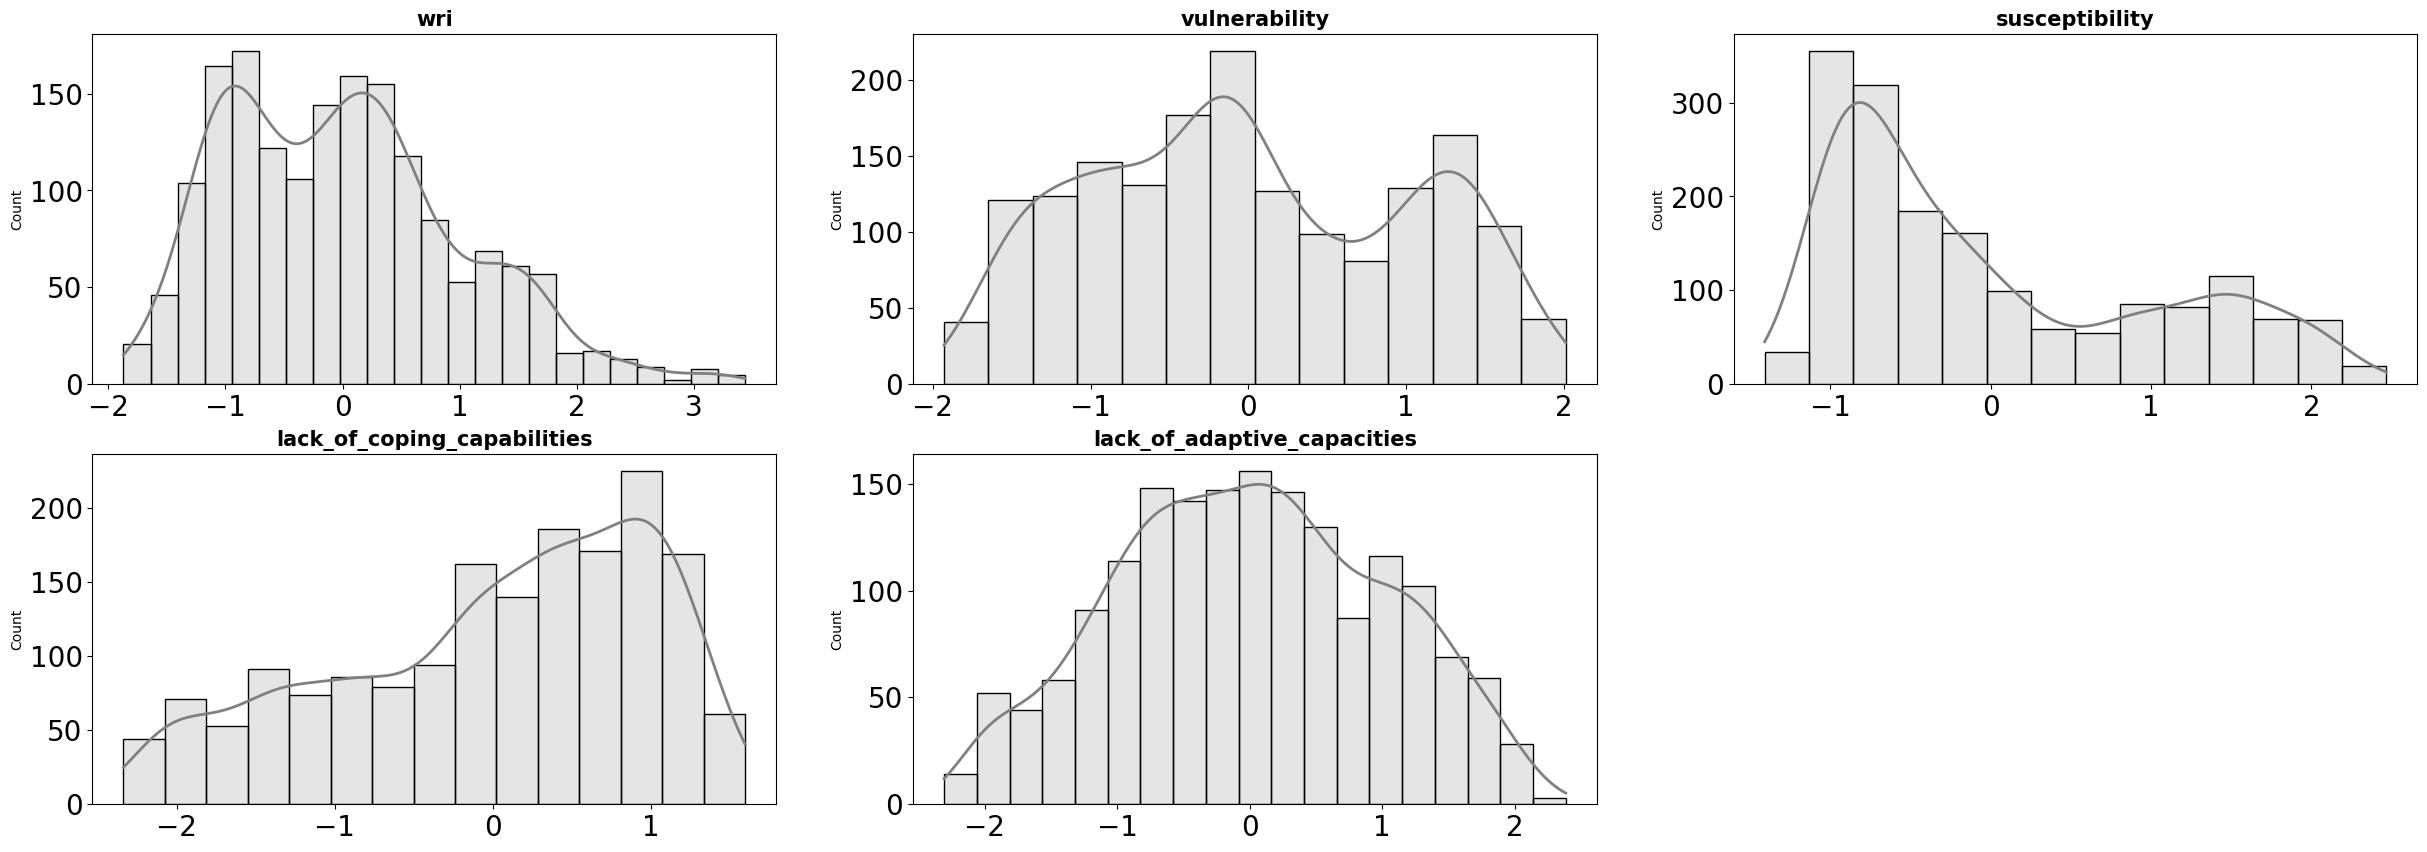

In [11]:
#Representamos todas las columnas estandarizadas
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))
columnas_estandar = numericas_estandar.columns
axes = axes.flat
for i, colum in enumerate(columnas_estandar):
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,
        line_kws = {'linewidth': 2},
        color = "grey",
        alpha = 0.2,
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = 'bold')
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel('')
fig.delaxes(axes[-1])

In [12]:
df_limpio[numericas_estandar.columns] = numericas_estandar #Reemplazamos las columnas por las estandarizadas
df_limpio.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,Papua-Neuguinea,Very High,Very High,Very High,Very High,2.906480,23.26,1.296928,1.179006,0.962932,1.537045,2011.0,0.895683
1,Madagaskar,Very High,Very High,Very High,Very High,2.594391,20.68,1.545395,2.260942,1.017385,0.974085,2011.0,0.792566
2,Afghanistan,Very High,Very High,Very High,Very High,2.468295,18.45,1.991215,1.863344,1.567891,2.201180,2011.0,0.703437
3,Niger,Very High,Very High,Very High,Very High,2.458838,18.49,1.967788,2.376753,1.275704,1.847071,2011.0,0.705036
4,Gambia,Very High,Very High,High,High,2.417856,22.20,1.028584,0.884833,0.907151,1.122232,2011.0,0.853317


In [13]:
#Guardamos los nuevos df con la columnas estandarizadas
df_limpio.to_csv('../datos/world_risk_index_sin_outliers_est.csv')

### Estandarizacion de nuestra df de outliers

In [14]:
#Seleccionamos las variables numericas
numericas_outliers = outliers.select_dtypes(include = np.number)

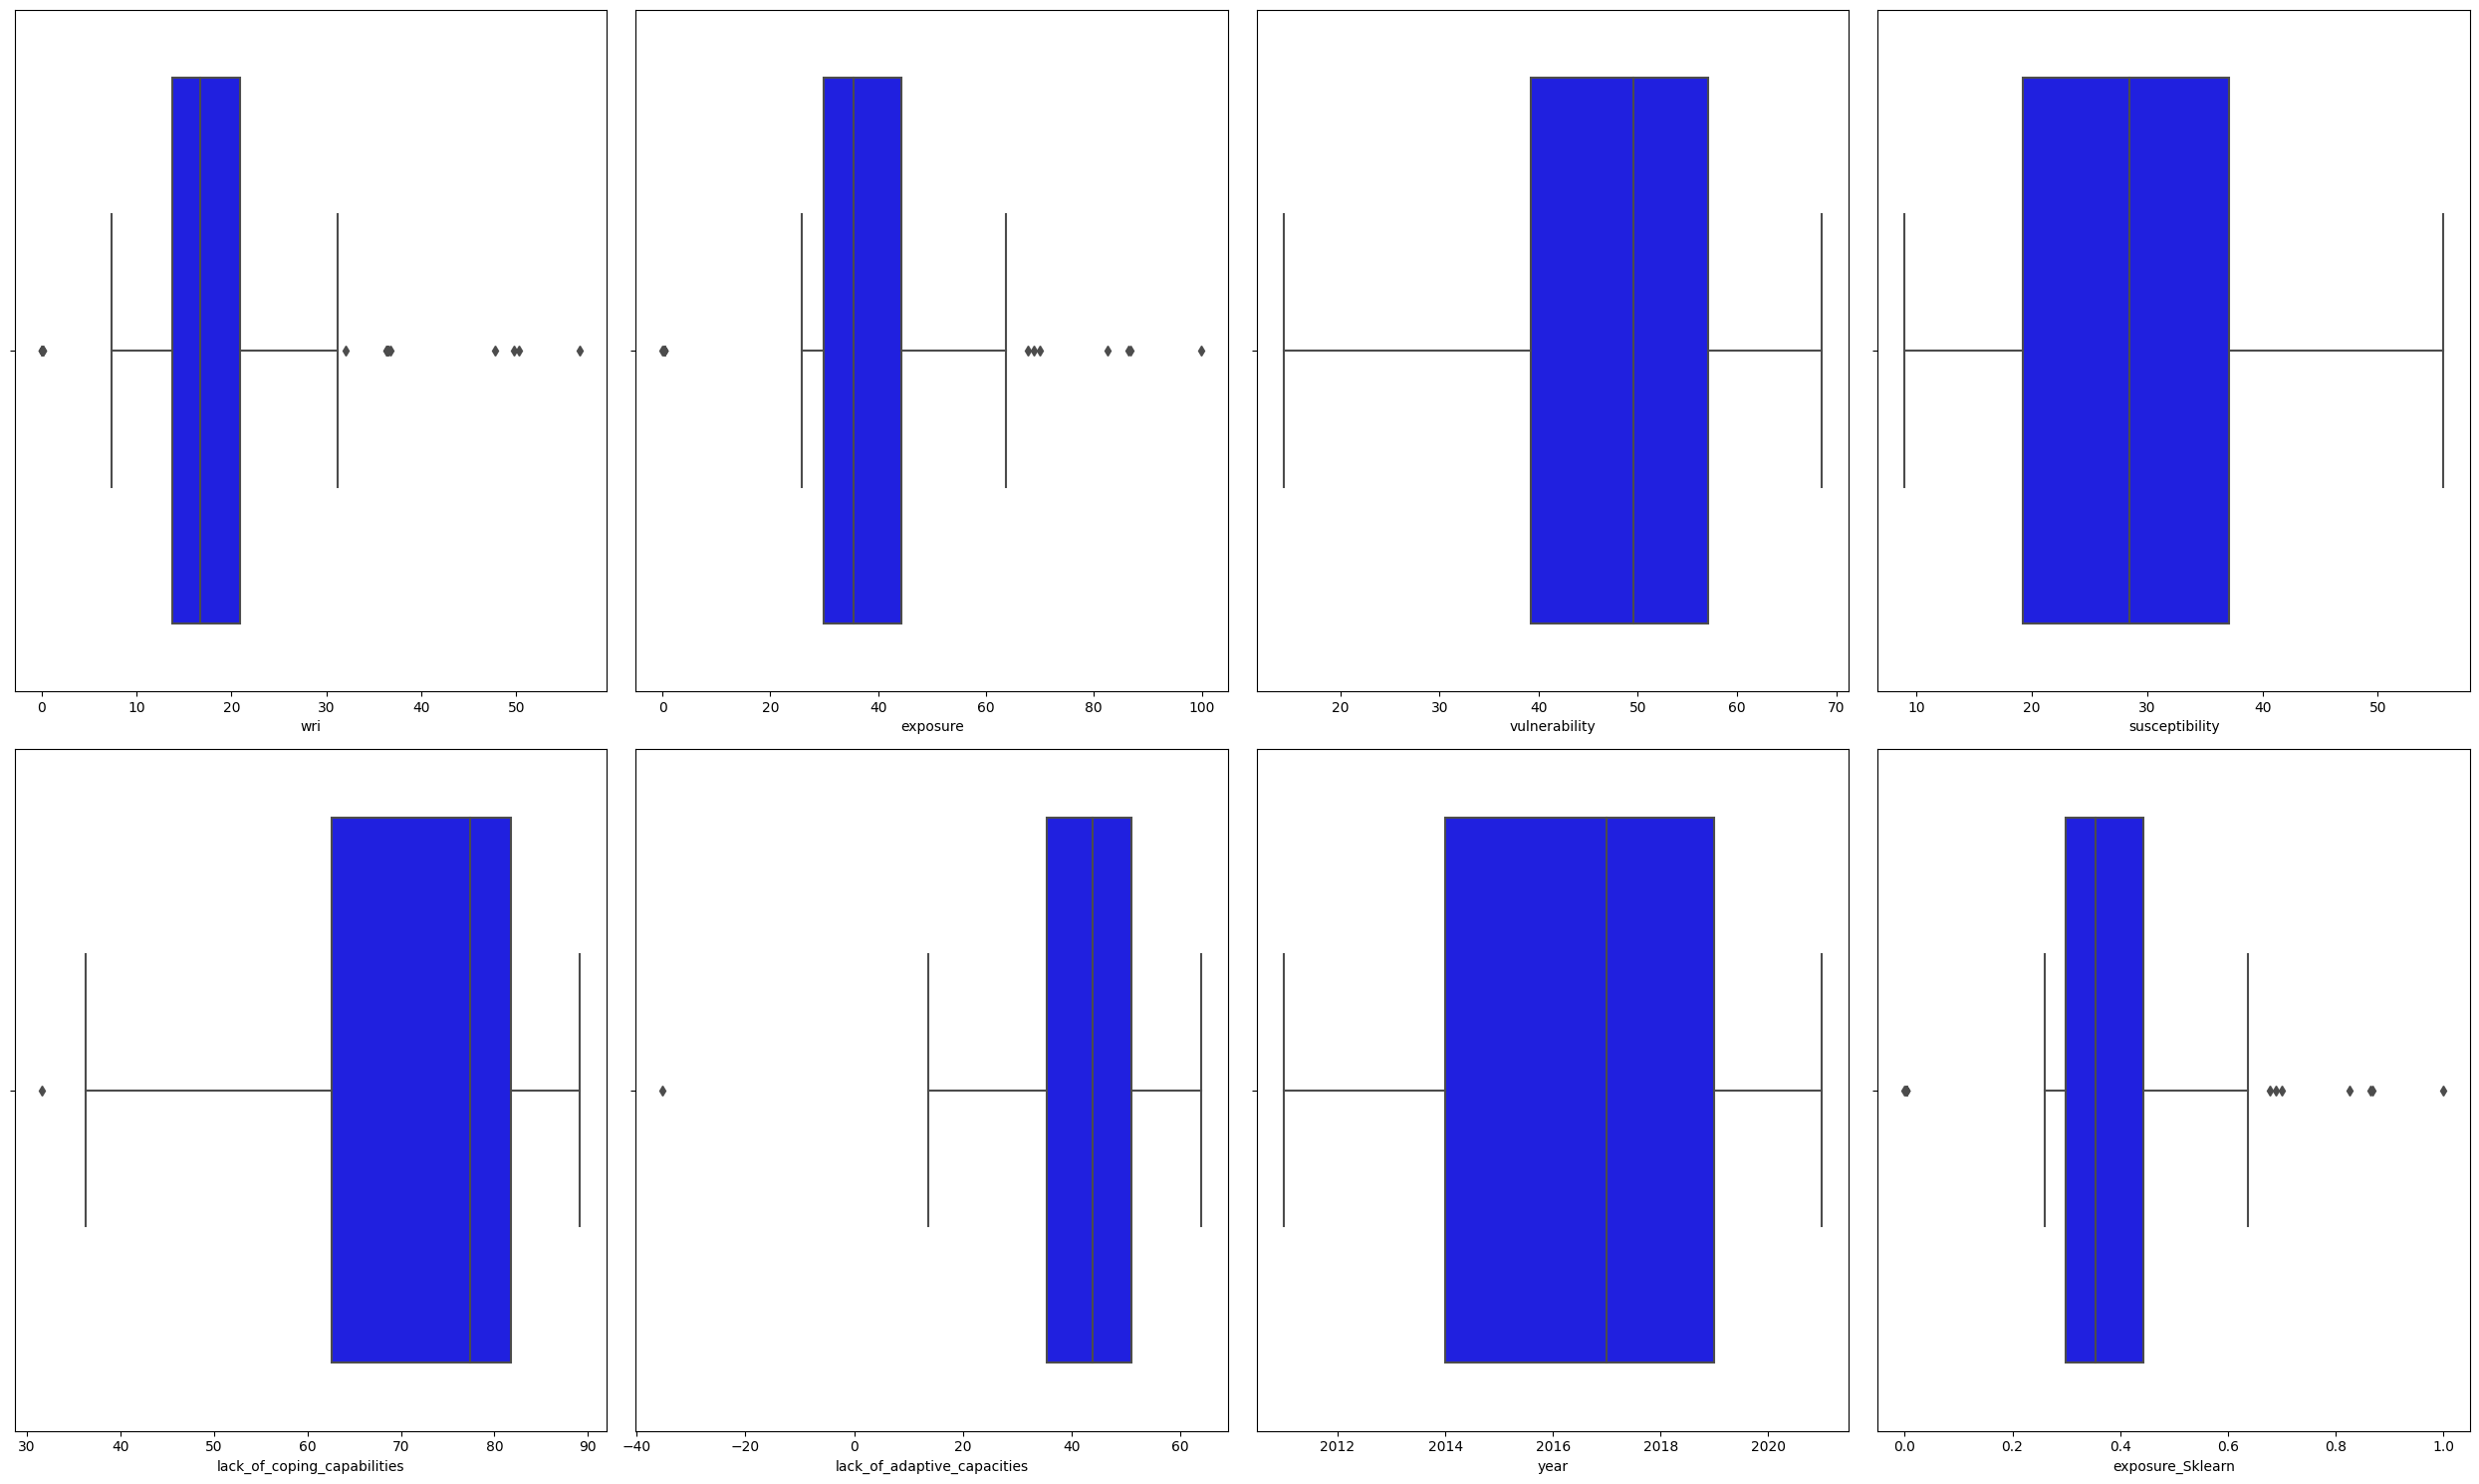

In [15]:
#Representamos para ver los outliers
fig, axes = plt.subplots(2, 4, figsize=(25,15))

axes = axes.flat

for indice, columna in enumerate(numericas_outliers.columns):
    sns.boxplot(x = numericas_outliers[columna], data = outliers, ax=axes[indice], color = "blue"); # para trazar una línea de densidad

    
plt.tight_layout()
plt.show()

In [16]:
#Como vemos que tampoco tenemos muchos outliers usamos el mismo método de StandardScaler
scaler = StandardScaler()

numericas_outliers.drop(['exposure', 'exposure_Sklearn', 'year'], axis = 1, inplace = True)

scaler.fit(numericas_outliers)

X_out_escaladas = scaler.transform(numericas_outliers)
numericas_out_estandar = pd.DataFrame(X_out_escaladas, columns = numericas_outliers.columns)

numericas_out_estandar.head(2)

,wri,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities
0,1.640675,0.801253,0.792708,0.541556,0.926242
1,1.292570,0.376459,0.030528,0.707655,0.185736


In [17]:
for columna in numericas_out_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_out_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_out_estandar[columna].std()}')
    print('-------------------------------------------------------------')


La media de la columna wri es:  2.54667271999325e-16
La desviación estándar de la columna wri es: 1.0023781246425447
-------------------------------------------------------------
La media de la columna vulnerability es:  -3.7884387570147525e-17
La desviación estándar de la columna vulnerability es: 1.0023781246425447
-------------------------------------------------------------
La media de la columna susceptibility es:  -2.988657241644971e-16
La desviación estándar de la columna susceptibility es: 1.0023781246425447
-------------------------------------------------------------
La media de la columna lack_of_coping_capabilities es:  3.998907576848905e-16
La desviación estándar de la columna lack_of_coping_capabilities es: 1.0023781246425447
-------------------------------------------------------------
La media de la columna lack_of_adaptive_capacities es:  7.576877514029505e-16
La desviación estándar de la columna lack_of_adaptive_capacities es: 1.0023781246425447
----------------------

In [18]:
numericas_out_estandar.describe().T #Comprobamos que la desviación estandar es 1 e igual para todos.

,count,mean,std,min,25%,50%,75%,max
wri,211.0,2.546673e-16,1.002378,-2.171794,-0.536772,-0.178533,0.315014,4.586457
vulnerability,211.0,-3.788439e-17,1.002378,-2.875676,-0.722726,0.173147,0.826342,1.819545
susceptibility,211.0,-2.988657e-16,1.002378,-1.825661,-0.876188,-0.015017,0.785272,2.514121
lack_of_coping_capabilities,211.0,3.998908e-16,1.002378,-2.682511,-0.591425,0.407867,0.707655,1.204600
lack_of_adaptive_capacities,211.0,7.576878e-16,1.002378,-6.418941,-0.593073,0.091010,0.682427,1.740882


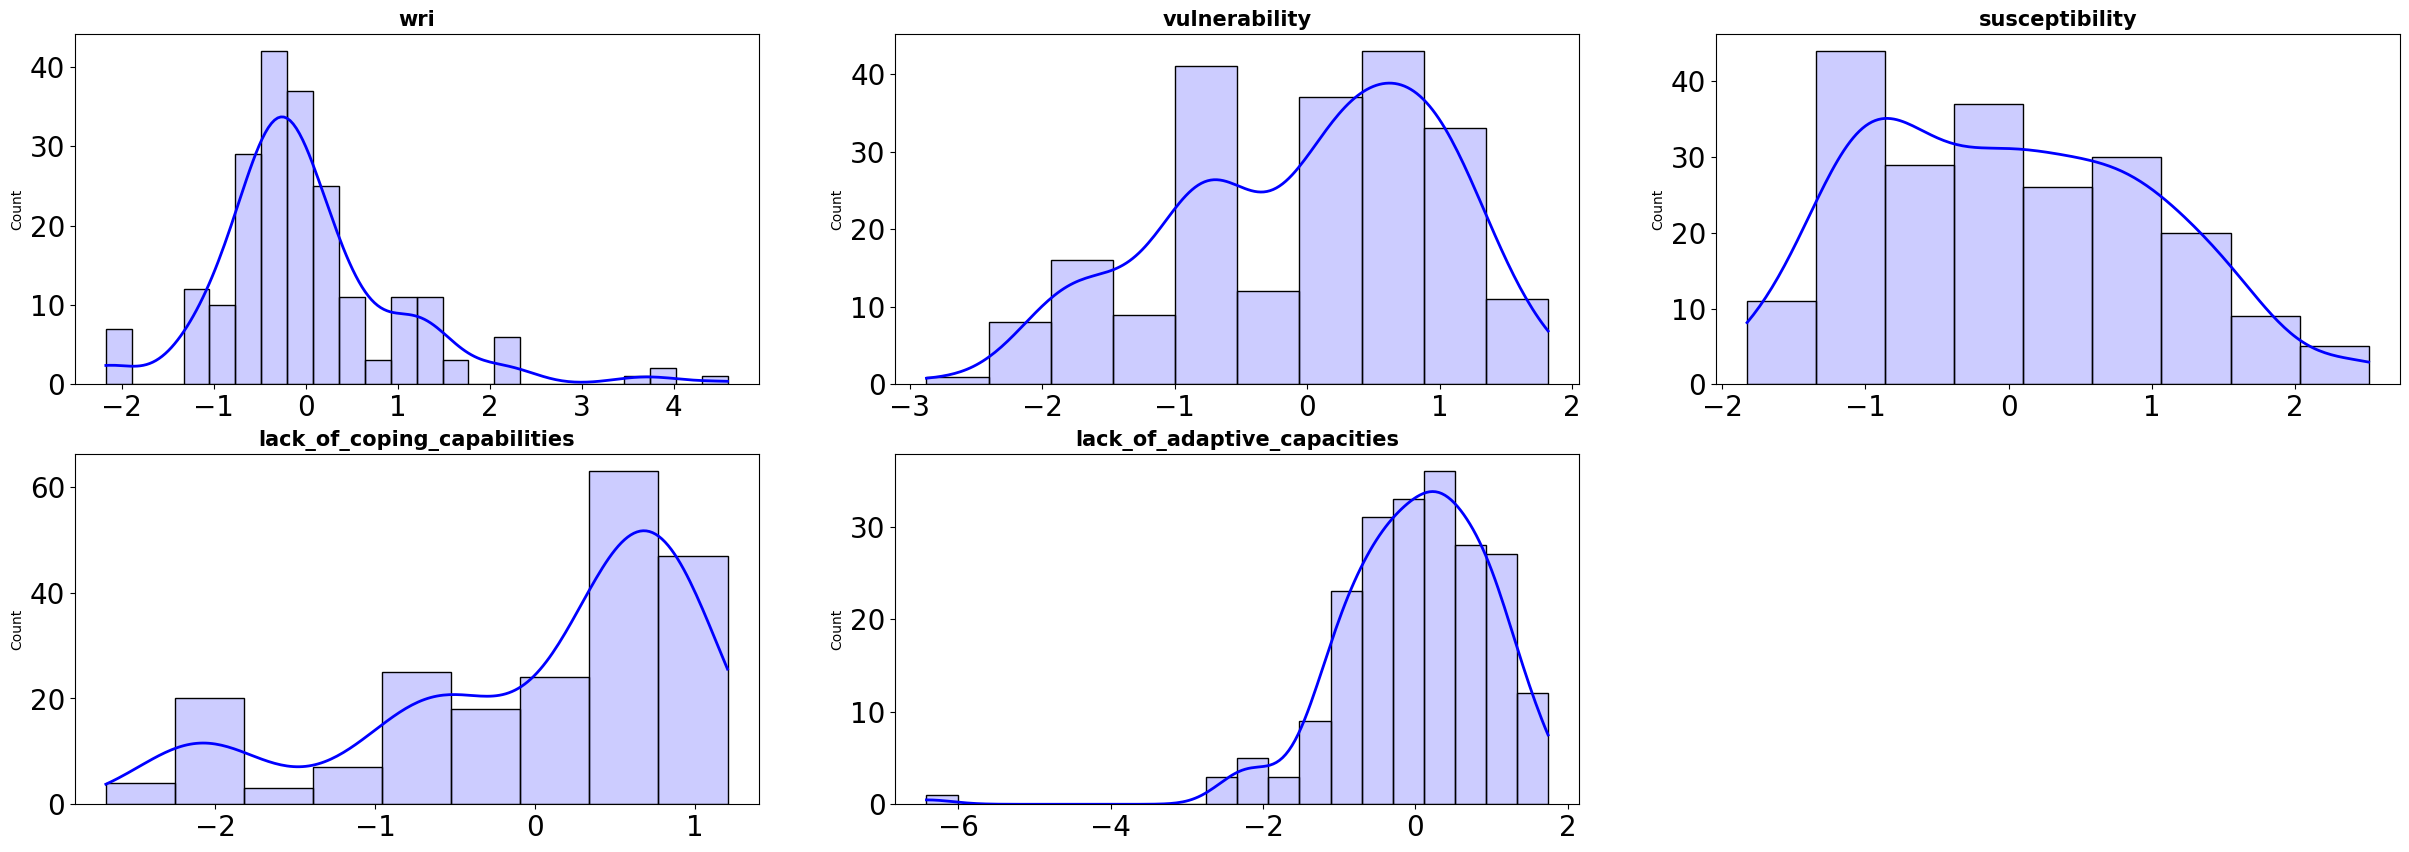

In [20]:
#Representamos todas las columnas estandarizadas
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))
columnas_estandar = numericas_out_estandar.columns
axes = axes.flat
for i, colum in enumerate(columnas_estandar):
    sns.histplot(
        data = numericas_out_estandar,
        x = colum,
        kde = True,
        line_kws = {'linewidth': 2},
        alpha = 0.2,
        color = "blue",
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = 'bold')
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel('')
fig.delaxes(axes[-1])

In [ ]:
outliers[numericas_out_estandar.columns] = numericas_out_estandar #Reemplazamos en el df de outliers
outliers.head()

,region,exposure_category,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn
0,Vanuatu,Very High,Very High,High,High,1.640675,56.33,0.801253,0.792708,0.541556,0.926242,2011.0,0.563758
1,Tonga,Very High,Very High,Medium,Medium,1.292570,56.04,0.376459,0.030528,0.707655,0.185736,2011.0,0.560853
2,Philippinen,Very High,Very High,High,High,0.725110,45.09,0.552087,0.592868,0.773824,0.106661,2011.0,0.451167
3,Salomonen,Very High,Very High,Very High,High,0.628547,36.40,1.475212,1.440562,0.987862,1.731821,2011.0,0.364119
4,Guatemala,Very High,Very High,High,High,0.315014,38.42,0.588423,0.627259,0.439602,0.589349,2011.0,0.384353


In [ ]:
outliers.to_csv('../datos/world_risk_index_outliers_est.csv') #Guardamos el csv con los cambios